In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# -- Data Collection and Analysis 

# -- load the csv data to pandas DataFrame
gold_dataset = pd.read_csv("./gld_price_data.csv")

In [3]:
# -- print the 1st 5 rows
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# -- print the last 5 rows
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# -- number of rows and columns
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
# -- check the number of missing values 
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
# -- statistical measures
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
# -- Correlation 
# - positive correlation, negative correlation

correlation = gold_dataset.corr()

<ipython-input-8-a2900a594dfd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_dataset.corr()


<AxesSubplot:>

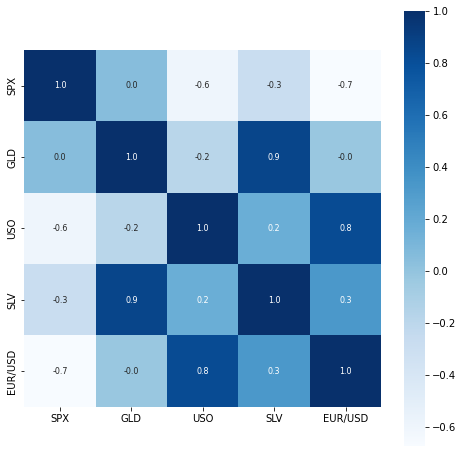

In [9]:
# -- constructing a heatmap to understand the correlation 
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [10]:
# -- correlation values of GLD
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

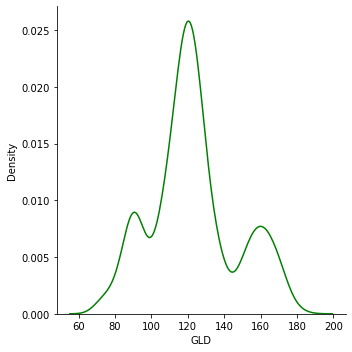

In [11]:
# -- check the distribution of GLD
sns.displot(gold_dataset['GLD'], color='green', kind='kde')

In [12]:
# -- Splitting the Features and Target
X = gold_dataset.drop(['Date', 'GLD'], axis=1)
y = gold_dataset['GLD']

In [13]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [14]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [17]:
# -- splitting into training data, and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [18]:
# -- Model Training : Random Forest Classifier
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
# -- training the model 
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
# -- model evaluation

# -- prediction on test data 
test_data_prediction = regressor.predict(X_test)

In [21]:
test_data_prediction

array([168.80739958,  82.3775998 , 116.12550007, 127.71240076,
       120.72100134, 154.58959776, 149.97149868, 126.19680041,
       117.358699  , 125.8641014 , 116.64430102, 172.08710066,
       142.01289858, 167.82039842, 115.06980011, 117.94190042,
       137.62890333, 169.63160056, 158.57520199, 161.09539864,
       155.23340023, 124.97959955, 176.2972996 , 156.774903  ,
       125.07470033,  93.69329968,  77.4710004 , 120.76339998,
       119.14689969, 167.5135994 ,  88.22690056, 125.35670004,
        91.28170043, 117.59570041, 121.08119907, 135.90870105,
       115.68090145, 115.26340078, 145.9158992 , 107.12840101,
       104.25350247,  87.02879786, 126.58680054, 117.84440008,
       152.87619887, 119.63749996, 108.34690016, 107.87169851,
        93.14910048, 127.05299791,  75.0211004 , 113.62969906,
       121.41009994, 111.30069888, 118.8159988 , 120.58029913,
       159.32929975, 168.03930039, 146.81709636,  85.78529859,
        94.22750012,  86.89399913,  90.49250007, 119.03

In [23]:
# -- R Squared Error 
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error : {}".format(error_score))

R Squared Error : 0.9893606490358079


In [24]:
# -- compare the actual values and the predicted values 
y_test = list(y_test)

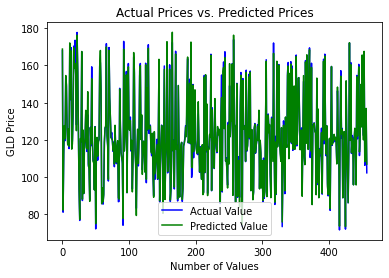

In [25]:
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title("Actual Prices vs. Predicted Prices")
plt.xlabel("Number of Values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()